# Linear Regression

### The linear regression model

<b>A linear regression</b> is a linear approximation of a causal relationship between two or more variables
<hr>
Process
<ul>
    <li>Get sample data</li>
    <li>Design a model that works for that sample</li>
    <li>Make predictions for the whole population</li>
</ul>
<hr>
<ul>
    <li>y is dependent variable, being predicted</li>
    <li>x1, x2, x3, ... are independent variables (called predictors)</li>
</ul>
<hr>
<h5>Simple linear regression model</h5>
<p>y(hat) = B0 + B1x1</p>
<p>For example, y: is your income and x1 is the number of education years</p>
<p>The coefficient B1 quantifies the effect of education on income. If B1=5000, an additional year of education contributes to additional 5000 dollars in the income.</p>
<p>The constant B0: is the minimum wage</p>


### Correlation and Regression

<p style='color: red'>Correlation does not imply causation</p>
<table style='width: 100%'>
    <tr>
        <th>Correlation</th><th>Regression</th>
    <tr>
    <tr>
        <td>Measure the relationship between the two variables</td><td>How one variable affects another</td>      
    </tr>
    <tr>
        <td>Does not capture the causality</td><td>Based on the causality</td>
    </tr>
    <tr>
         <td>p(x,y)=p(y,x)</td>
        <td>One way</td>
    </tr>
</table>



### Geometrical representation of the Linear Regression Model

<img src="images/linear_regression_geometrical representation.png"></img>

### First Regression in python

In [2]:
import numpy as np   # allow to work with multi-dimentional arrays
import pandas as pd   # allow to organize data in a tabular form
import scipy # tools for scientific computations
import statsmodels.api as sm # build on top of numpy and scipy: statistics in py => good summary
import matplotlib.pyplot as plt # visualization of numpy computation
import seaborn as sns # visualization library based on matplotlib. A high level interface for drawing attractive statistical graphics
import sklearn # machine learning library

In [4]:
data = pd.read_csv('datasets/1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


##### Why would I predict GPA with SAT?
The SAT is considered one of the best estimators of intellectual capacity and capability

#### 1. Define dependent and independent variables 

In [6]:
y = data['GPA']
x1 = data['SAT']


#### 2. Explore the data

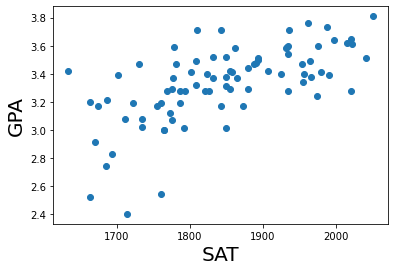

In [7]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()
# There is a positive correlation => the higher SA, the higher GPA|

#### 3. Regression itself 

In [8]:
# add constant b0 to the model
x = sm.add_constant(x1)

In [9]:
# create Ordinary Least Squares regression (OLS)
# fit() will obtain the fit of the model
results = sm.OLS(y,x).fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.20e-11
Time:                        18:09:17   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

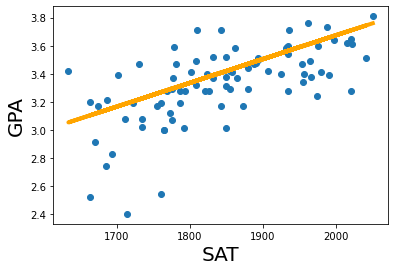

In [11]:
# plot the best fit line y=0.2750 + 0.0017x
plt.scatter(x1,y)

yhat = 0.2750 + 0.0017*x1
plt.plot(x1, yhat, lw=4, c='orange', label='regression line')

plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

### Graph in seaborn 

In [12]:
sns.set() # draw by using matplotlib but using seaborn to style

### How to interpret the regression table

<p>In the second table - the coefficient table:</p>
<ul>
    <li>constant coef: B0 = 0.2750</li>
    <li>SAT coef: B1=0.0017</li>
    <p>=> Thus, the line is GPA=0.2750 + 0.0017*GPA</p>
    <li>standard error: show the accuracy of the coefficient. The lower the std error, the better.</li>
    <li>p-value less than 0.05 means that the predicted value is significant. p-value in the example is 0.000 tells us that SAT is a significant variable when predicting college GPA</li>
    <li> p-value of 0.503 suggest about the intercept coefficient that it is not significant different from 0 => may ommit this constant in the equation</li>
</ul>


### Decomposition of variability

<h5>1. sum of squares total (SST/TSS)</h5>
<p>Is the sum of square of difference between the observed dependent variable and its mean: E(yi-mean_y)^2 - measure the total variability of the dataset</p>
<h5>2. sum of squares regression (SSR/ESS)</h5>
<p>sum of square of difference between the predicted value and the mean of the dependent variable: E(yi_hat-mean_y)^2 - measure how well your line fits the data.</p>
<h5>3. sum of squares error (SSE/RSS)</h5>
<p>Is the square of difference between the observed value and the predicted value. => The goal is to </p>
<hr>
<p>SST = SSR + SSE</p>
<p>Total variability = Explained variability+Unexplained Variability</p>


### What is OLS

<h5>Ordinary Least Square is to estimate the linear regression equation</h5>
<p>Min SSE (Sum of Square of Errors)=> Lower error results in better explanatory power. => the method aims to find a line that minizie the sum of square of error</p>
Other methods:
<p>Generalized least squares, Maximum likelihood estimation, Bayesian regression, Gaussian process regression</p>

### R-squared: measure the goodness of fit

 R^2 = SSR (Variability explained by the regression)/SST (Total variability of the dataset)
 <p>From 0 and 1</p>
 <p>R^2=1 => Your regression explains the entire variability.</p>
 <p>R^2=? to be good enough? 0.75-0.99 in physics and chemistry, but maybe 0.2 in social science</p>
 <p>depends on how many variables are in play. For example, salary may depends on household income, education, tenure, country you are living: may account for R^2 less than 0.5 of the total variability</p>

In our example, R^2=0.406, SAT explains 41% of the variability of the college grade for our sample => we may miss some important infomation, other variable may be used to explain in addition.


## Multiple linear regression Theory

 yhat = B0 + B1x1 + B2x2 + B3x3 + ... + Bkxk + e
 <ul>
    <li>yhat: the predicted value</li>
    <li>B0: the intercept</li>
    <li>B1, B2, ...: the coefficients</li>

 </ul>
 
 <strong style='color:red'>Its not about the line, its about the best fitting model (min SSE)</strong>
 <p>We prefer multiple linear regression  because it is More realistic - things often depend on 2, 3, 10 or even more factors.</p>

### Adjusted  R^2

<p>1. The R^squared measures how much of the total variability explained by our model</p>
<p>2. Mutiple regression are always better than simple ones, as with each additional variables you add, the explanatory power may only increases or stay the same.</p>
<p>Adjusted R^square is less than the R^ square penalize the excessive use of the variables</p>


In [31]:
data = pd.read_csv('datasets/1.02. Multiple linear regression.csv')
data.head()
# new model: GPA = b0 + SAT*b1 + Rand1,2,3*b2

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [32]:
 data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [33]:
y = data['GPA']

In [34]:
x1 = data[['SAT', 'Rand 1,2,3']]

In [35]:
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()

In [36]:

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           6.58e-10
Time:                        18:09:57   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p>adjustde R^2 is less than that of the previous model, penalize the excessive use of the variables</p>
rand123 has a P_value for its coefficient high: 0.7.. => cannot reject that its coefficient is different from 0 => rand123 should be dropped because its not significant and rerun the new model

### F statistics

<p>z statistics follows a normal distribution</p>
<p> t-statistics follows a t distribution</p>
<p>F-statistics follows an F distribution: is used for testing the overall significance of the model</p>
<hr>
<p>H0: B1=B2=B3=...=Bn=0</p>
<p>H1: at least one Bi#0, if our all betas are 0, then none of the independent variables matter, our model has no merit.</p>
<p>In the example, P(F) is very low. The overall model is significant.</p>
<p>The first model has higher F-statistics 56.05>27.76 => the lowwer the F statistics, the closer to a non significant model</p>

## OLS assumptions

Assumptions:
<ul>
    <li>Linearity: y=B0 + B1x1 </li>
    <li>No endogeneity</li>
    <li>Normality and homoscedascity: normality means that the error is normally distributed, the expected value is 0. Homoscedacity: constant variance</li>
    <li>No autocorrelation: covariance of two error terms = 0</li>
    <li>No multicollinerity</li>
</ul>
<strong style='color: red'>The biggest mistakes is to perform a regression that violates one of these assumptions</strong>

### Linearity

Verify that the relationship between the two variables is linear => how? => draw a scatter plot 
If the relationship is non-linear, what to do?
<p>Run a non-linear regression</p>
<p>Exponential and Log transformation</p>

### No endogeneity

<p>Is the prohibition of a link between independent variables and the errors</p>
<p>Omitted Variable bias: The difference between the observed values and the predicted values, is correlated with our independent values. Happens when forgeting to induce a relevant variable.</p>
<ul>
    <li>y is explained (somewhat correlated) by xs</li>
    <li>y is explained (somewhat correlated) by omitted x*</li>
    => x and error are somewhat correlated
</ul>

Example, try to predict price of aparments in London based on its size. however, y=11342789-132100x1, it seems that the smaller the house, the higher the size. covariance between x and error is not 0. 
<p>Why is bigger real estate cheaper?</p>
<p>What is it small size is so expensive?</p>
<p>Where are the small houses</p>
<p>Why is bigger real estate cheaper? => because not in the city of London => the location should be the second prediction: y = 520365+78210xsize+7126579xcity</p>
=> when in doubt if a variable is a predictor of the dependent variable, try it

<p>y_i = alpha + beta*x_i + e</p>
<p>Assumption E[e|x_i]=0</p>
<p>i) In the case of omitted variable, the error term correlated with the x_i term, the assumption is violated</p>
<p>ii) measurement error in independent variable</p>
<p>Reverse causality</p>

### Normality and homoscedasticity

<p>Normality e(0, delta^2): we assume the error term normally distributed. Normal distribution is not required for creating regression but for making inferences. t statistics and P values work because we assume the normality of the error term. What if the error term is not normally distributed => Central Limit Theorem. For large sample, the Central Limit Theorem applies for the error term too. </p>
<p>zero mean of the error term: if the mean is not expected to be zero, the line is not the best one. However, having an intercept solves the problem</p>
<p>homoscedasticity: to have equal variance with one another . a violated example is that for smaller values of independent variables, we have a better prediction (smaller error) than the bigger ones. => check for omitted variable bias. look for outliers and try to remove them. Log transformation by calculating the natural log of each dependent values and perform the regression between log of y and x. When applying log, the scale of y is reduced, points come closer to each other logyhat = b0+b1x1. As a increase by 1 unit, y increase by b1 percent. 
</p>
<p>Sometimes, we need to tranform the two scales: log_yhat=b0+b1*log(x1). As x increases 1%, y increases by 1 percent</p>


### No autocorrelation

<p>Errors is assumed to be uncorrelated</p>
<p>Where can we observe serial correlation between errors? common in time series data. For example, in stock price, errors on Mondays would be biased downward, and errors on Friday would be biased upward. (the scatter plot of the residuals would show correlation) The mathematics of linear regression does not consider this. In linear regression, errors should be randomly spread around the regression line. </p>
<p>How to detect correlation? To plot all residuals on the graph and look for patterns. If you can't find any pattern, you are safe</p>
<p>Another method is the Durbin-Watson test. The Durbin-Watson value is from 0 to 4. 2 indicates no auto correlation. Values below 1 and above 3 cause alarms. There is no remedy if there is auto correlation of errors. Not using linear regression model in such a case.</p>

### No multicollinearity

<p>We observed multicollinearity when two or more variables have a high correlation. For example, two independent variables, such that a=2+5*b, when a can be presented using b, and vice versa. => the coefficient will be wrongly estimated. Rationale, if a can be represented using b, there is no point of using both. </p>
<p>How to fix? There are three types to fix: 1)drop one of the two variables, 2)transform two to one (average price), 
=> Before running the model, find the correlation between each two pairs of independent variables</p>

## Dummy variables to include categorical data into the regression model

In [37]:
raw_data = pd.read_csv('1.03. Dummies.csv')

FileNotFoundError: [Errno 2] No such file or directory: '1.03. Dummies.csv'

In [ ]:
raw_data

In [ ]:
data = raw_data.copy()

In [ ]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
y=data['GPA']
x1=data[['SAT', 'Attendance']]

In [ ]:
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()
result.summary()

 Notice: F statistics, P(F), P, Adj R-Squared is greater than what we got without attendance

## Making predictions with linear regression

In [ ]:
new_data = pd.DataFrame({'const': 1, 'SAT': [1700, 1670], 'Attendance': [0,1]})
new_data

In [ ]:
predictions = result.predict(new_data)

In [ ]:
predictions

In [ ]:
new_data.join(pd.DataFrame({'Prediction': predictions}))

# Linear Regression with sklearn

sklearn made from Scripy, Numpy, and Matplotlib
<p>sklearn is fast and efficient, prefers working with array</p>
<p>for machine learning</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

Need convert df to nd array so that we can use sklearn

In [ ]:
data = pd.read_csv("1.01. Simple linear regression.csv")
data.head()

#### Declare dependent and independent variables
We are predicting GPA using a single feature: SAT

In [ ]:
x = data["SAT"] # inputs/features
y = data["GPA"] # outputs/targets the correct values we are aiming for
# our model will find the optimal coefficient of a linear regression model when given a SAT can predict the GPA

In [ ]:
type(x)

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x_matrix = x.values.reshape(-1,1) # = (84,1), 
#need a two dimensional array because there are probably more than one feature

#### Regression itself

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_matrix,y)

* Standardization/normalization: is the process of subtracting the mean and dividing by the standard deviation
* Normalization (special case): we subtract by the mean but divide by the L2-norm of the inputs


copy_X = True: copy the inputs before fitting them

fit_intercept = False: if you dont want constand: like sm.add_constant

n_jobs=1: when we want to parallel routines

#####  Rsquared

In [ ]:
reg.score(x_matrix, y)

###### Coefficients

In [ ]:
reg.coef_ # return an array of coefficient for each feature

###### Intercepts


In [ ]:
reg.intercept_

In [ ]:
reg.predict(np.array([[1740]]))

In [ ]:
new_data = pd.DataFrame(data=[1740, 1760], columns=["SAT"])

In [ ]:
reg.predict(new_data)

In [ ]:
new_data["Predicted Values"] = reg.predict(new_data)

In [ ]:
new_data

In [ ]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_

fig = plt.plot(x, yhat, lw=4, c="orange", label="regression line")
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# Multiple linear Regression with sklearn

In [ ]:
data = pd.read_csv("1.02. Multiple linear regression.csv")
data.head()

In [ ]:
data.describe()

 ### Declare the dependent variable and independent

In [38]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

### Regression itself

In [39]:
reg = LinearRegression()
reg.fit(x,y)

NameError: name 'LinearRegression' is not defined

### Summary

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

### Calculating the R-squared (measure goodness of fit) using reg.score()

In [ ]:
reg.score(x,y)

the adjusted R Squared is much more appropriate for multiple variables linear regressionm

#### Formula for Adjusted R_squared
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$
* n is the number of observations = 84
* p is number of predictors = 2



In [ ]:
r2 = reg.score(x,y)

n = x.shape[0]

p = x.shape[1]

adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

In [40]:
adjusted_r2
# the ad.R^2<R^2, thus one or more predictors have little or no explanatory power

NameError: name 'adjusted_r2' is not defined

### Feature selection through  p-values

if p-value (type-1 error, of the rejection of the hypothesis that the coef is 0) >=0.05, we can drop the feature

feature_selection.f_regression: 
* F-regression creates simple linear regressions of each feature and the dependent variable
* Ex, one to predict GPA with SAT and one to predict GPA with Rand 1,2,
* then, it will create F-statistics for each regression and return the p value,  p-value of the F-stat = p-value of the only independent variable

In [ ]:
from sklearn.feature_selection import f_regression


In [ ]:
f_regression(x, y)
# the first is the f-statistics for each regression
# the second is the p-values

In [ ]:
p_values = f_regression(x,y)[1]
p_values

In [ ]:
p_values = np.round(p_values, 3) # SAT is useful and Rand 1,2,3 is useless
p_values

#### Summary Table

In [41]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])

In [42]:
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [43]:
reg_summary["Coefficients"] = reg.coef_

NameError: name 'reg' is not defined

In [ ]:
reg_summary["p-values"] =  p_values

In [ ]:
reg_summary

### Feature scaling = Standardization: is the process of transforming data into a standard scale
allow compares features with the same magnitute impact

In [44]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

#### Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler() # scaler will substract each value from mean and divide by the std

In [47]:
scaler.fit(x) # calculates and store the mean and the standard deviation of each feature

StandardScaler()

In [48]:
x_scaled = scaler.transform(x)

In [49]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

### Feature selection through standardization

In [50]:
reg = LinearRegression()
reg.fit(x_scaled, y)

NameError: name 'LinearRegression' is not defined

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
reg_summary = pd.DataFrame([['Bias'], ['Sat'], ['Rand 1,2,3']], columns=['Features'])

In [ ]:
reg_summary

In [ ]:
reg_summary["weight"] = reg.intercept_, reg.coef_[0], reg.coef_[1
                                                               ]

In [ ]:
reg_summary
# the bigger weight, the bigger impact
# the intercept is called bias 

### Making prediction with standardized coefficients

In [ ]:
new_data = pd.DataFrame([[1700, 2], [1800, 1]], columns = ['SAT', 'Rand 1,2,3'])

In [ ]:
new_data

In [ ]:
reg.predict(new_data) # new data is a dataframe

<p style="color:red;"><p>

<p style="color:red;">Need to scale new_data as well</p>

In [ ]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

In [ ]:
reg.predict(new_data_scaled)

#### What if we remove rand 1,2,3

In [ ]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:, 0].reshape(-1,1)
reg_simple.fit(x_simple_matrix, y)

In [ ]:
reg_simple.predict(new_data_scaled[:, 0].reshape(-1, 1))

## Overfitting and underfitting

### Overfitting
Our training has focused on the particular training  set so much,  it has missed the point (capture noise in the trainning dataset as well) - high train accuracy => fix: split dataset into train and test 

### Underfitting
The model has not captured the underlying logic of the data - low accuracy

## Train test Split

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split

In [52]:
a = np.arange(1,101)

In [53]:
b = np.arange(501,601)

In [54]:
train_test_split(a)

[array([ 97,  82,  64,  12,  61,  41,  40,  53,  14,  22,  10,  81,  95,
         59,  51,  45,  44,  48,  16,  46,   1,  76,  50,   4,  56,  26,
         58,  29,  13,  74,  86,  23,   6,  42,  65,  15,  87,  37,   7,
         28,  43,  11,  80,  36,  83,  21,  52,  63,  32,  89,  57,  67,
         66,  35,  88,  55,  17,  73,  84,  94,  30,  75, 100,  77,   5,
         39,  68,  79,  85,  33,  54,  24,  25,   3,  69]),
 array([ 2,  9, 60, 91, 47,  8, 90, 34, 78, 19, 27, 92, 18, 62, 71, 31, 93,
        38, 70, 20, 72, 49, 96, 99, 98])]

In [55]:
a_train, a_test = train_test_split(a, test_size=20, random_state=42)

In [56]:
a_train.shape, a_test.shape

((80,), (20,))

In [57]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [58]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [59]:
a_train, a_test, b_train, b_test= train_test_split(a, b, test_size=20, random_state=42)

In [60]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [61]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [62]:
b_train

array([556, 589, 527, 543, 570, 516, 541, 597, 510, 573, 512, 548, 586,
       529, 594, 506, 567, 566, 536, 517, 550, 535, 508, 596, 528, 520,
       582, 526, 563, 514, 525, 504, 518, 539, 509, 579, 507, 565, 537,
       590, 557, 600, 555, 544, 551, 568, 547, 569, 562, 598, 580, 542,
       559, 549, 599, 558, 576, 533, 595, 560, 564, 585, 538, 530, 502,
       553, 522, 503, 524, 588, 592, 575, 587, 583, 521, 561, 572, 515,
       593, 552])

In [63]:
b_test

array([584, 554, 571, 546, 545, 540, 523, 581, 511, 501, 519, 531, 574,
       534, 591, 505, 577, 578, 513, 532])

## Assumption again

### Linearity

The functional form is incorrect. For example, beginning got y = B0 + B1x1, but the actual model is y = B0 + B1x1 + B2*x1^2. Detection: Residual plot, evenly spread around the residual line. Remedy: transformation or adding another independent variable X^2 if the scatter plot of x and y shows a quadratic line 

### No heteroskedascity (constant variance)
For example, expenditure = B0 + B1*income + ei. In this example, when your income is low, you don't really have a choice, spend small amount. When income is low, expediture variance is low. When income is high, expenditure is high. When we look at residual plot, the spread of the error term is increasing => standard errors in the output can be relied on, thus hypothesis conducted on the gradient(e.g. B1) is impossible. Detection: Goldfield-Quant test. Remedies: White standard error, weighted least square, log things. 

### No autocorrelation - Independent error terms (time series data)
Stock index = B0 + B1*time1 + ei. When drawing a scatter plot (time1, stock index) has some pattern => standard error can not be relied upon. Detection: Durbin-Watson test. Remedy: Investigate omitted variables (for incorporating business cycle - the cause of autocorrelation)/ Generalized difference equation

### Normality of errors
medical_insurance = B0 + B1*age + ei. The error term does not follow a normal distribution with mean=0.A weak assumption if sample size is large, central limit theorem applied. Detection: looks at the histogram or Q-Q plot of the residuals, Sharpiro-Wilk test. Get more sample or log transformation

### No multicollinearity
Motor_accidents = B0 + B1*(num cars) + B2(Num Residents) + e. Occurs when X variables are themself correlated. When interpreting the effect of B1 on the number of cars, we have to keep the number of residents the same. But this is incorrect since num_cars and num_Residents are correlated. Coefficients and std errors are unreliable. Detection: look at correlation between X variables/ VIF. Remedy: remove one variable.

### Exorgenity (no omitted variable) 
Salary = B0 + B1*(years of education) +ei. Other variable associated to years of education also affect the salary (E.g. social-economic status). A third variable pulls the string relationship between x and y, thus would cause omitted variable bias. Years of education relates to the error term when omitted variable incorporated in the error term. Issue: the model can only be used for predictive purposes (Cannot infer causation). Detection: intuition, checking correlation. Remedy: using instrumental variable 

# Practical example of linear regression

In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [65]:
raw_data = pd.read_csv("datasets/1.04. Real-life example.csv")
raw_data.head()
# Rationale:
## The brand affects the prices
# Mileage: the more miles, the cheaper
# EngineV: Sport car has a larger engine then the economy cars
# Year: the older the cheaper

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [66]:
raw_data.describe(include="all")
# Since the number of observations are different across the columns, there are missing values
# there are 312 unique models, hard to implement, 312 dummies
# => decide to drop Model, Model could be engineer from  Brand, Year, EngineV, don't loose too much variability
# top and fre, e.g. 3947 Yes for Registration

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determine the variables of interest

In [67]:
data = raw_data.drop(["Model"], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Dealing with missing values
 Price and EngineV have missing values

In [68]:
data.isnull().sum()
# if you are removing <5% of the observations, you are free to remove all of them

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [69]:
data_no_mv = data.dropna(axis=0)

In [70]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

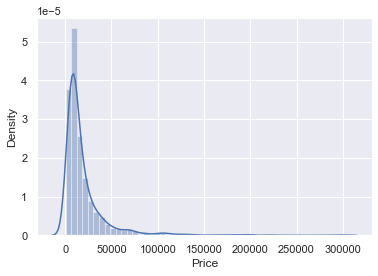

In [71]:
sns.distplot(data_no_mv['Price'])
# we are looking for a normal distribution, but price follows an exponential one
# look at the percentile, we can see that there are a few outliers
# One way to deal with outliers is to remove the top 1% of outliers

### Dealing with outliers

In [72]:
q = data_no_mv['Price'].quantile(0.99)

In [73]:
q

129812.51999999981

In [74]:
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

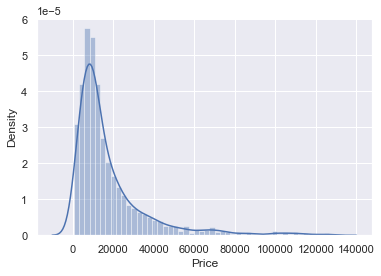

In [75]:
sns.distplot(data_1["Price"])

In [76]:
# However we have similar issues with other variables

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

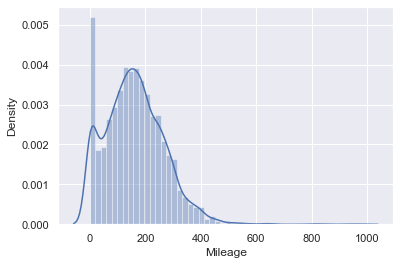

In [77]:
sns.distplot(data["Mileage"])

In [78]:
data_2 = data_1[data_1['Mileage']<data_1['Mileage'].quantile(0.99)]

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

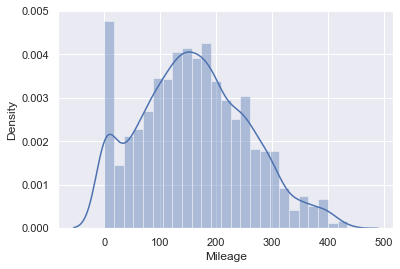

In [79]:
sns.distplot(data_2["Mileage"])

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

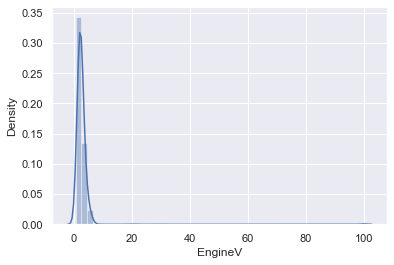

In [80]:
sns.distplot(data_2["EngineV"])

In [81]:
data_2["EngineV"].sort_values().unique()
# 99.99 are those missing values

array([ 0.6 ,  0.65,  1.  ,  1.1 ,  1.2 ,  1.3 ,  1.33,  1.39,  1.4 ,
        1.46,  1.5 ,  1.59,  1.6 ,  1.7 ,  1.79,  1.8 ,  1.9 ,  2.  ,
        2.1 ,  2.14,  2.15,  2.17,  2.2 ,  2.3 ,  2.4 ,  2.5 ,  2.57,
        2.6 ,  2.7 ,  2.8 ,  2.9 ,  2.98,  2.99,  3.  ,  3.2 ,  3.5 ,
        3.6 ,  3.7 ,  3.8 ,  4.  ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,  4.6 ,
        4.7 ,  4.8 ,  5.  ,  5.2 ,  5.46,  5.5 ,  5.7 ,  6.  ,  6.2 ,
        6.3 ,  6.5 ,  7.2 ,  9.  , 15.  , 19.  , 20.  , 22.  , 28.  ,
       30.  , 55.  , 66.  , 74.  , 75.  , 90.  , 99.99])

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

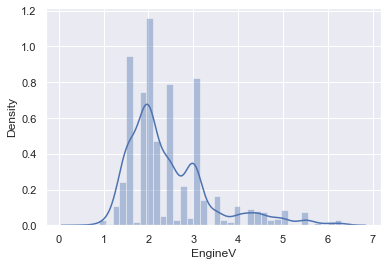

In [82]:
data_3 = data_2[data_2["EngineV"]<6.5]
sns.distplot(data_3["EngineV"])

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

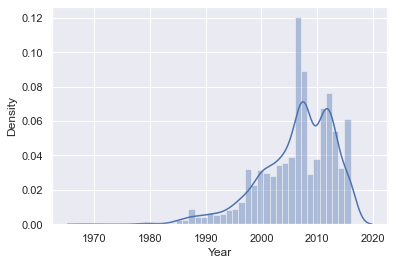

In [83]:
sns.distplot(data_3["Year"])

In [84]:
data_4 = data_3[data_3["Year"]>data_3["Year"].quantile(0.01)]

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

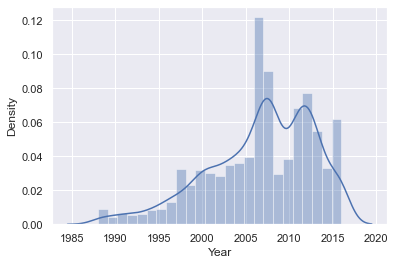

In [85]:
sns.distplot(data_4["Year"])

In [86]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [87]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking OLS assumptions


#### Checking linearity

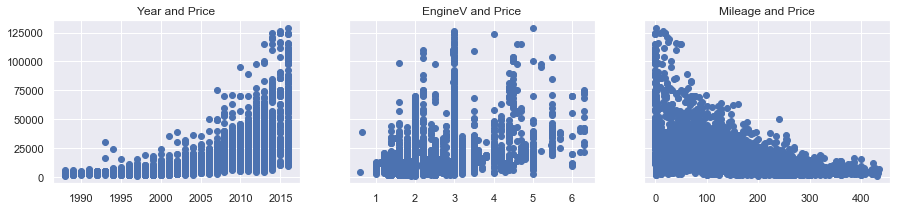

In [88]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Year and Price')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Price')

plt.show()

# We can see some pattern but not linear ones, need to transform

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

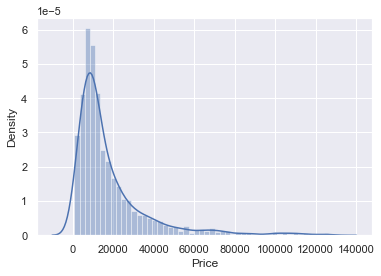

In [89]:
sns.distplot(data_cleaned["Price"])
# price does not follow a normal distribution, thus relationship of price with other variables is rather linear
# log transformation is especially useful when facing exponential relationship

### Relaxing the assumptions

In [90]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price

In [91]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


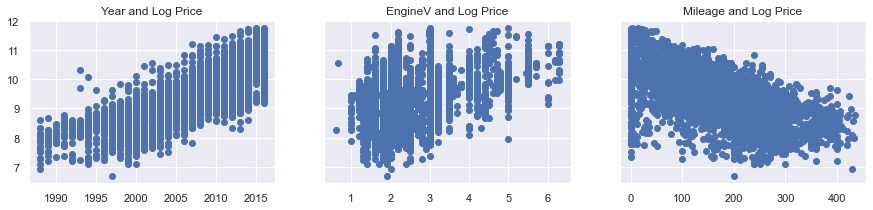

In [92]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Year and Log Price')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('EngineV and Log Price')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Mileage and Log Price')

plt.show()


In [93]:
data_cleaned.drop(inplace=True, columns=["Price"], axis=1)

In [94]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### No endogeinity

Can take residuals and find if there is a correlation between the residual with each independent variable x.

### Normality and Homoscedasticity
* Normality is assumed for a big sample following a Central Limit Theorem
* Zero mean of the distribution of error: inclusion of intercept
* variance of prices with the respect to each independent variable stays consistent (as seeing in the picture above) (we have take log => common remedy for homoscedasticity)

### No autocorrelation:
Our data does not come from time series data or panel data

### Multicollinearity

In [95]:
data_cleaned.columns.values
# It is logical that Mileade and Year is correlated

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

<strong style="color:red">To check for multicollinearity, using Variance Inflation Factor</strong>
Estimate how much larger the square root of the standard error of an estimate is compared to a situation where the variable is completely uncorrelated with other predictors

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [97]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


* If vif=1, no multicollinearity at all
* 1 < vif < 5, absolutely okay


In [98]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy variables

 for the first brand (Audi), we don't need to create a dummy variable. Because if the all dummy variables are 0, it is clear that the car is Audi. If we include a seperate dummy variable for each category, we will introduce multicollinerity to the regression!
 * Thus if we have n categories, there will be only n-1 dummies

In [99]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [100]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearrange a bit

In [101]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [102]:
cols= ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [103]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

In [104]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [106]:
inputs_scaled = scaler.transform(inputs)

In [107]:
inputs_scaled
# it is not usually recommended to transform dummy variables
# has no effect on the predicted power, once scaled 

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

### Train and Test

In [108]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

### Create the regression

In [109]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [110]:
y_hat = reg.predict(x_train)

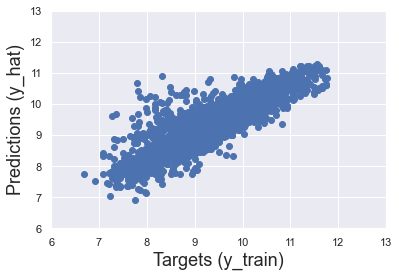

In [111]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Tuyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

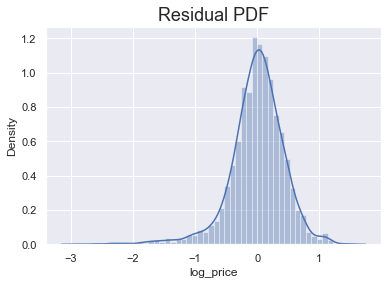

In [112]:
# residual = targets - predictions
sns.distplot(y_train-y_hat)
plt.title("Residual PDF", size=18)
# the error is normally distributed with mean=0
# Notice: there are certain observations where (y_train - y_hat) is much lower than the mean (higher price is predicted than is observed)

In [113]:
reg.score(x_train, y_train)
# our model explain 75% of the total variability

0.744996578792662

### Finding weights and bias

In [114]:
reg.intercept_

9.304582140750977

In [115]:
reg.coef_

array([-0.00469263,  0.220212  ,  0.03873566,  0.0324979 , -0.52381377,
       -0.57111309, -0.18076831, -0.2173311 , -0.5882892 , -0.34486661,
       -0.41347478, -0.44050048, -0.46254013, -0.34320264, -0.21126668,
       -0.30601747,  1.1001902 ])

In [116]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary
# a positive weight shows that as a feature increases in value, so do log_price and price respectively

,Features,Weights
0,Mileage,-0.004693
1,EngineV,0.220212
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


In [117]:
data_cleaned["Brand"].unique()
# Whenever all other brands are 0, Audi is 1, so Audi is the benchmark
# a positive weight means that the respective category is more expensive then the benmark
# a negative weight means that the respective category is cheaper then the benmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [118]:
# Scale is important to compare the weight of features, e.g. Mileage is as twice important as EngineV
# Dummies are only compared to their respective benchmark

### Testing

In [119]:
y_hat_test = reg.predict(x_test)

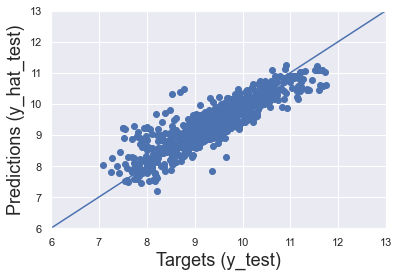

In [120]:
x = np.arange(1000)
y = x
plt.plot(x,y)
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
# for higher price, there are more concentration on the 45* line
# for the lower one, the situation is not so amazing
